# Chapter 4

# 4.4.3. Handling data distribution

Log transformation

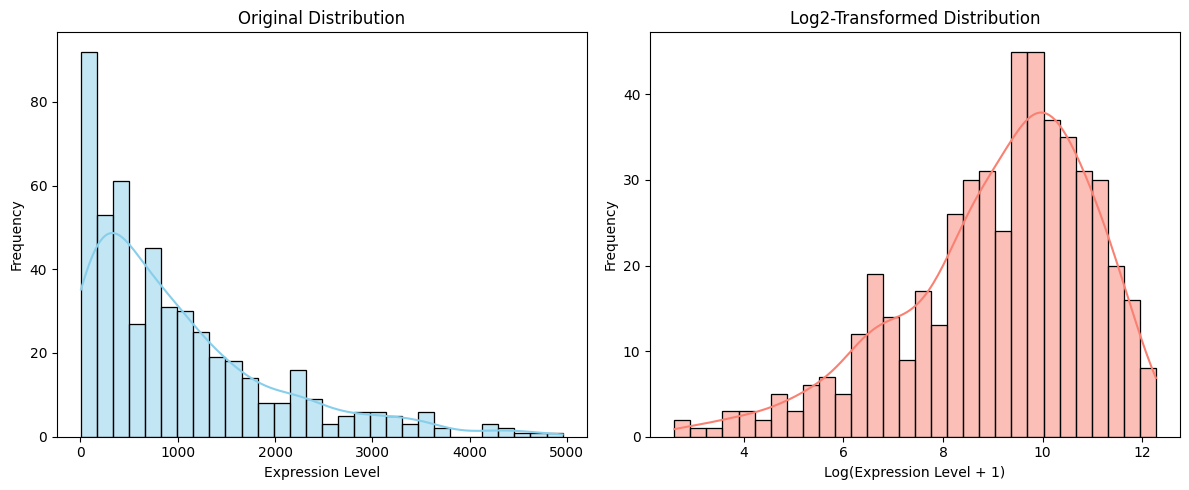

   Generated_Gene_Expression  Log_Expression
0                 469.268090        8.877340
1                3010.121431       11.556085
2                1316.745694       10.363856
3                 912.942554        9.835960
4                 169.624870        7.414684


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic gene expression data
np.random.seed(42)  # For reproducibility
generated_gene_expression = np.random.exponential(scale=1000, size=500)

# Create a DataFrame
df = pd.DataFrame({'Generated_Gene_Expression': generated_gene_expression})

# Plot the original distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Generated_Gene_Expression'], bins=30, kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')

# Apply logarithmic transformation
df['Log_Expression'] = np.log2(df['Generated_Gene_Expression'] + 1)  # Adding 1 to handle zero values

# Plot the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Log_Expression'], bins=30, kde=True, color='salmon')
plt.title('Log2-Transformed Distribution')
plt.xlabel('Log(Expression Level + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display first few rows of the DataFrame
print(df.head())

Square root transformation

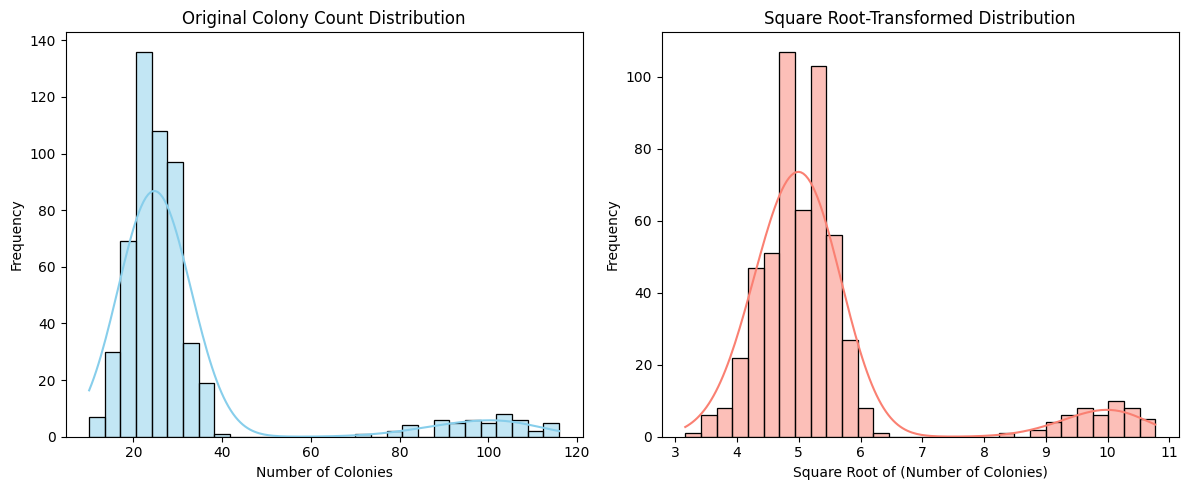

   Colony_Counts  Sqrt_Counts
0             23     4.795832
1             29     5.385165
2             19     4.358899
3             26     5.099020
4             31     5.567764


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic bacterial colony count data
np.random.seed(42)  # For reproducibility
colony_counts = np.random.poisson(lam=25, size=500)

# Introduce some higher counts to simulate overgrowth
extra_counts = np.random.poisson(lam=100, size=50)
colony_counts = np.concatenate([colony_counts, extra_counts])

# Create a DataFrame
df = pd.DataFrame({'Colony_Counts': colony_counts})

# Plot the original distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Colony_Counts'], bins=30, kde=True, color='skyblue')
plt.title('Original Colony Count Distribution')
plt.xlabel('Number of Colonies')
plt.ylabel('Frequency')

# Apply square root transformation
df['Sqrt_Counts'] = np.sqrt(df['Colony_Counts'])

# Plot the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Sqrt_Counts'], bins=30, kde=True, color='salmon')
plt.title('Square Root-Transformed Distribution')
plt.xlabel('Square Root of (Number of Colonies)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

# Display first few rows of the DataFrame
print(df.head())

Box-Cox transformation

Original Skewness: 1.24
Original Kurtosis: 1.68
Transformed Skewness: 0.00
Transformed Kurtosis: -0.69


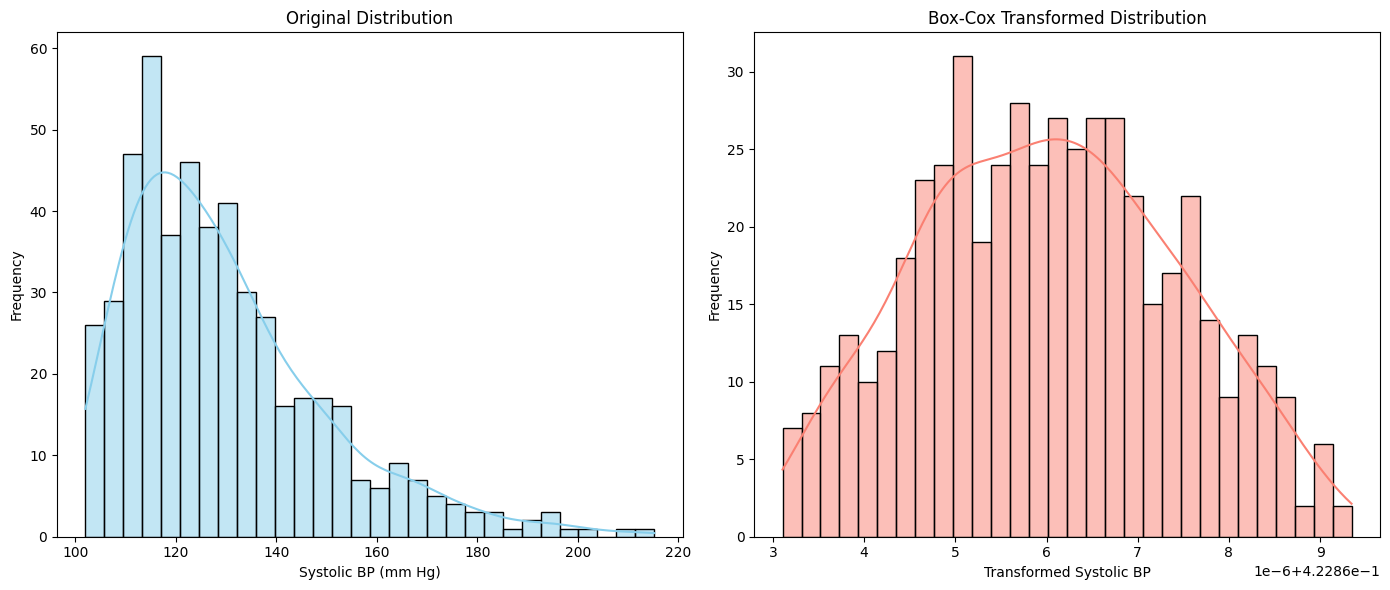

   Systolic_BP  BoxCox_BP
0   135.905191   0.422867
1   122.416971   0.422866
2   120.734254   0.422866
3   120.734534   0.422866
4   169.745716   0.422868
Optimal Lambda for Box-Cox Transformation: -2.3648


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate synthetic systolic blood pressure data
np.random.seed(42)  # For reproducibility

# Simulate skewed blood pressure data
blood_pressure = np.random.gamma(shape=2.0, scale=15.0, size=500) + 100

# Create a DataFrame
df = pd.DataFrame({'Systolic_BP': blood_pressure})

# Plot the original distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Systolic_BP'], bins=30, kde=True, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('Systolic BP (mm Hg)')
plt.ylabel('Frequency')

# Check skewness and kurtosis before transformation
original_skewness = df['Systolic_BP'].skew()
original_kurtosis = df['Systolic_BP'].kurtosis()
print(f"Original Skewness: {original_skewness:.2f}")
print(f"Original Kurtosis: {original_kurtosis:.2f}")

# Apply Box-Cox transformation
# The Box-Cox transformation requires positive data
fitted_data, fitted_lambda = stats.boxcox(df['Systolic_BP'])

# Store the transformed data in the DataFrame
df['BoxCox_BP'] = fitted_data

# Plot the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['BoxCox_BP'], bins=30, kde=True, color='salmon')
plt.title('Box-Cox Transformed Distribution')
plt.xlabel('Transformed Systolic BP')
plt.ylabel('Frequency')

# Check skewness and kurtosis after transformation
transformed_skewness = df['BoxCox_BP'].skew()
transformed_kurtosis = df['BoxCox_BP'].kurtosis()
print(f"Transformed Skewness: {transformed_skewness:.2f}")
print(f"Transformed Kurtosis: {transformed_kurtosis:.2f}")

plt.tight_layout()

plt.show()

# Display first few rows of the DataFrame
print(df.head())

# Print the lambda value used in the transformation
print(f"Optimal Lambda for Box-Cox Transformation: {fitted_lambda:.4f}")


Logit transformation

Original Skewness: 0.48
Original Kurtosis: -0.40
Transformed Skewness: -0.57
Transformed Kurtosis: 0.92


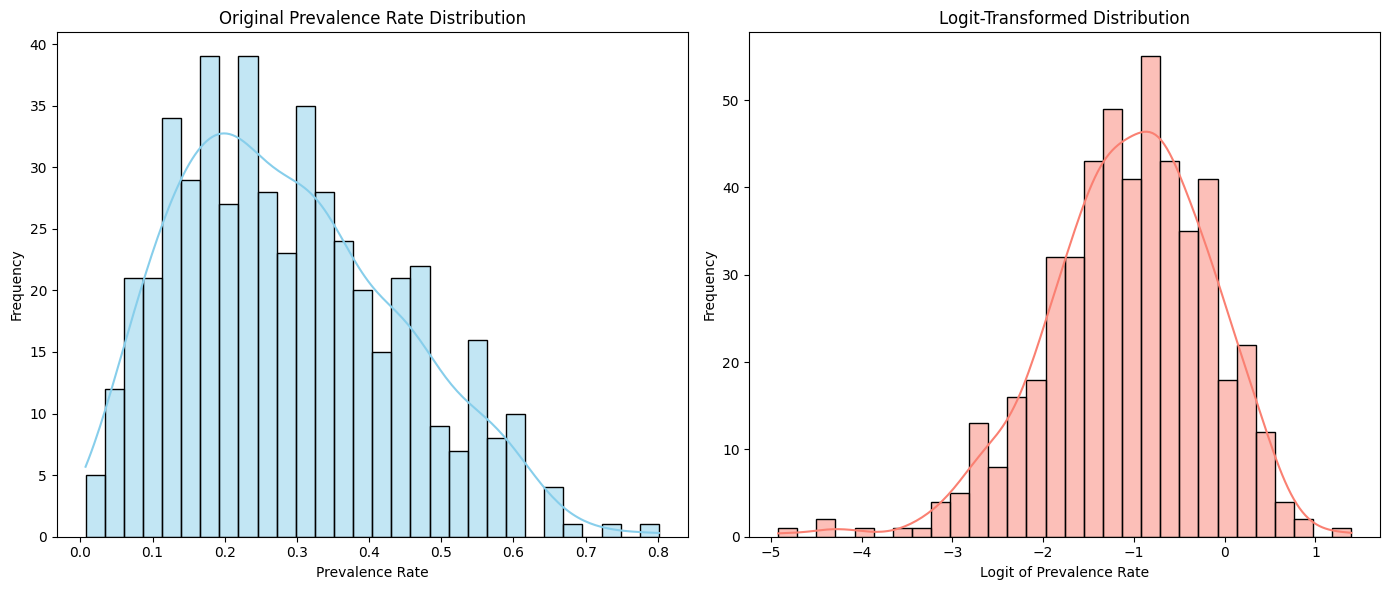

   Prevalence_Rate  Adjusted_Prevalence  Logit_Prevalence
0         0.353677             0.353677         -0.602917
1         0.248558             0.248558         -1.106317
2         0.415959             0.415959         -0.339384
3         0.159968             0.159968         -1.658469
4         0.550283             0.550283          0.201815


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import logit

# Generate synthetic prevalence data
np.random.seed(42)  # For reproducibility

# Simulate prevalence rates between 0 and 1
prevalence_rates = np.random.beta(a=2, b=5, size=500)

# Create a DataFrame
df = pd.DataFrame({'Prevalence_Rate': prevalence_rates})

# Plot the original distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Prevalence_Rate'], bins=30, kde=True, color='skyblue')
plt.title('Original Prevalence Rate Distribution')
plt.xlabel('Prevalence Rate')
plt.ylabel('Frequency')

# Check skewness and kurtosis before transformation
original_skewness = df['Prevalence_Rate'].skew()
original_kurtosis = df['Prevalence_Rate'].kurtosis()
print(f"Original Skewness: {original_skewness:.2f}")
print(f"Original Kurtosis: {original_kurtosis:.2f}")

# Apply logit transformation
# To avoid issues with 0 and 1, adjust the values slightly
epsilon = 1e-5
df['Adjusted_Prevalence'] = df['Prevalence_Rate'].clip(epsilon, 1 - epsilon)
df['Logit_Prevalence'] = logit(df['Adjusted_Prevalence'])

# Plot the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Logit_Prevalence'], bins=30, kde=True, color='salmon')
plt.title('Logit-Transformed Distribution')
plt.xlabel('Logit of Prevalence Rate')
plt.ylabel('Frequency')

# Check skewness and kurtosis after transformation
transformed_skewness = df['Logit_Prevalence'].skew()
transformed_kurtosis = df['Logit_Prevalence'].kurtosis()
print(f"Transformed Skewness: {transformed_skewness:.2f}")
print(f"Transformed Kurtosis: {transformed_kurtosis:.2f}")

plt.tight_layout()

plt.show()

# Display first few rows of the DataFrame
print(df.head())


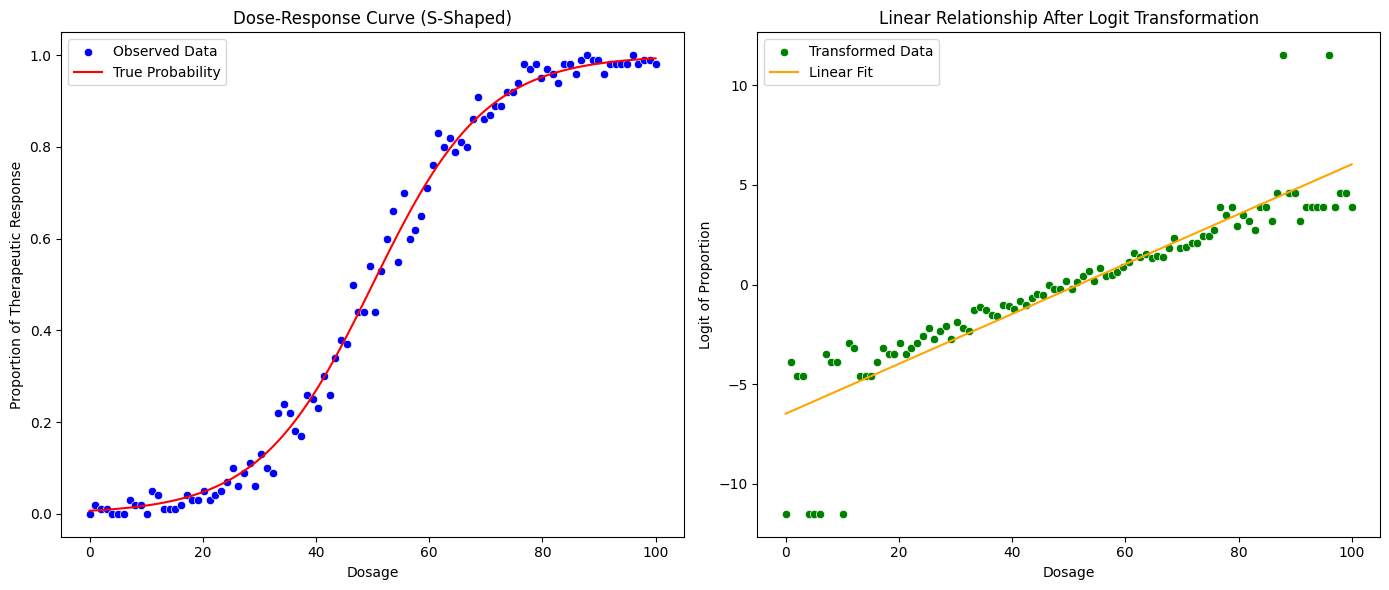

                            OLS Regression Results                            
Dep. Variable:       Logit_Proportion   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     414.7
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.45e-37
Time:                        21:29:43   Log-Likelihood:                -199.27
No. Observations:                 100   AIC:                             402.5
Df Residuals:                      98   BIC:                             407.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4867      0.356    -18.225      0.0

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit, logit
import statsmodels.api as sm

# Generate synthetic dose-response data
np.random.seed(42)  # For reproducibility

# Simulate dosage levels
dosage = np.linspace(0, 100, 100)

# True parameters for the sigmoid function
beta_0 = -5   # Intercept (logit scale)
beta_1 = 0.1  # Slope (logit scale)

# Calculate true probabilities using the logistic function
prob_response = expit(beta_0 + beta_1 * dosage)

# Simulate observed responses with binomial variability
n_patients = 100  # Number of patients at each dosage level
responses = np.random.binomial(n=n_patients, p=prob_response)

# Calculate observed proportions
observed_proportions = responses / n_patients

# Create a DataFrame
df = pd.DataFrame({
    'Dosage': dosage,
    'Responses': responses,
    'Total': n_patients,
    'Observed_Proportion': observed_proportions
})

# Plot the original S-shaped dose-response curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Dosage', y='Observed_Proportion', data=df, color='blue', label='Observed Data')
plt.plot(df['Dosage'], prob_response, color='red', label='True Probability')
plt.title('Dose-Response Curve (S-Shaped)')
plt.xlabel('Dosage')
plt.ylabel('Proportion of Therapeutic Response')
plt.legend()

# Apply logit transformation to the observed proportions
# Adjust proportions to avoid logit of 0 or 1
epsilon = 1e-5
df['Adjusted_Proportion'] = df['Observed_Proportion'].clip(epsilon, 1 - epsilon)
df['Logit_Proportion'] = logit(df['Adjusted_Proportion'])

# Plot the linear relationship after logit transformation
plt.subplot(1, 2, 2)
sns.scatterplot(x='Dosage', y='Logit_Proportion', data=df, color='green', label='Transformed Data')

# Fit a linear regression model to the transformed data
X = sm.add_constant(df['Dosage'])  # Adds intercept term
y = df['Logit_Proportion']
model = sm.OLS(y, X).fit()

# Add regression line to the plot
df['Fitted_Logit'] = model.predict(X)
plt.plot(df['Dosage'], df['Fitted_Logit'], color='orange', label='Linear Fit')

plt.title('Linear Relationship After Logit Transformation')
plt.xlabel('Dosage')
plt.ylabel('Logit of Proportion')
plt.legend()

plt.tight_layout()

plt.show()

# Print the regression summary
print(model.summary())
